In [ ]:
import os
import sys
sys.path.append("..")
import canon

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import keras, keras.layers as L, keras.backend as K

from canon.autoencode.feeder import ImageDataFeeder

IMAGE_DIR = "img/processed_981"
TEST_DIR = "img/test_981"
filenames = [filename for filename in os.listdir(IMAGE_DIR)]
IMAGE_SHAPE = (128, 128)
feeder = ImageDataFeeder(IMAGE_SHAPE, batch_size=30, training_dir=IMAGE_DIR, test_dir=TEST_DIR)
X_test = feeder.get_test_set()
print(X_test.shape, X_test.max(), X_test.min())

Using TensorFlow backend.


In [4]:
import canon.autoencode
from canon.autoencode import reset_tf_session
from canon.autoencode.models import load_encoder, load_decoder

s = reset_tf_session()
model_name = "ae_128_256_conv_4"
encoder = load_encoder(model_name)
decoder = load_decoder(model_name)
encoder.summary()
decoder.summary()

inp = L.Input(IMAGE_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)
autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='binary_crossentropy')
reconstruction_mse = autoencoder.evaluate(X_test, X_test, verbose=1)
print("Convolutional autoencoder MSE:", reconstruction_mse)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
__________

image 277


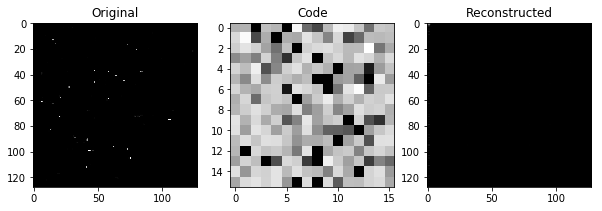

image 89


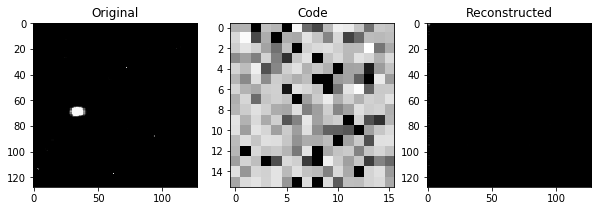

image 108


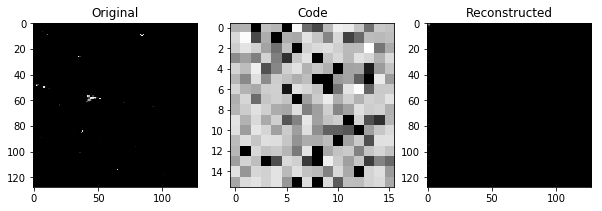

image 318


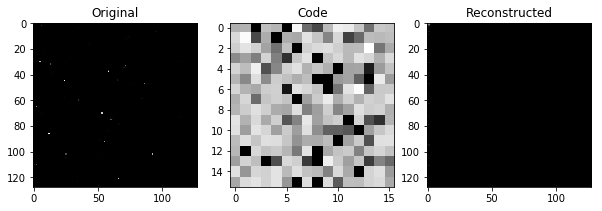

image 266


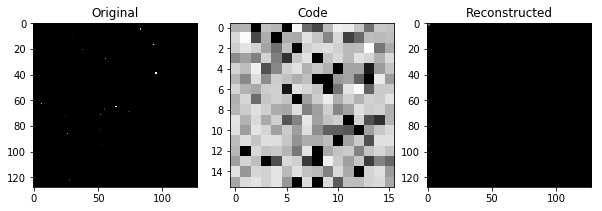

In [5]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.figure(figsize=(10,50))
    
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img, cmap='gray')

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([int(np.ceil(np.sqrt(code.shape[-1]))),-1]), cmap='gray')

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco, cmap='gray')
    plt.show()

# image 288
    
for i in np.random.choice(len(X_test), 5):
    img = X_test[i]
    print("image", i)
    visualize(img, encoder, decoder)